In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score, roc_curve


# Import Dataset

In [2]:
df = pd.read_csv('Flight_delay.csv')

In [3]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [4]:
df.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,752.142689,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,571.631124,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,331.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,599.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000


In [5]:
df.isnull().sum()

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [7]:
df.corr()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,1.000000,0.018649,0.008181,0.013005,-0.012214,0.004801,0.009373,0.007838,-0.002553,0.003026,0.011913,0.011218,-0.016737,NaN,NaN,0.016825,0.001648,-0.026705,0.005742,-0.000288
DepTime,0.018649,1.000000,0.363243,0.702809,-0.029193,-0.072032,-0.055900,-0.066996,0.106640,0.132379,-0.064510,-0.042002,-0.026436,NaN,NaN,-0.042486,0.000472,0.004867,-0.018189,0.188044
ArrTime,0.008181,0.363243,1.000000,0.500790,0.006500,-0.039458,-0.041244,-0.041938,-0.071198,-0.072950,-0.055781,0.030344,-0.009851,NaN,NaN,-0.075551,-0.025724,0.030976,-0.010336,-0.037784
CRSArrTime,0.013005,0.702809,0.500790,1.000000,-0.061340,0.010090,0.022881,0.011534,0.028811,0.045205,0.012401,-0.009451,-0.000575,NaN,NaN,-0.089387,-0.019193,-0.007638,-0.016704,0.143355
FlightNum,-0.012214,-0.029193,0.006500,-0.061340,1.000000,-0.334002,-0.353528,-0.354269,0.025789,0.016372,-0.369566,0.006770,0.004033,NaN,NaN,0.036285,0.062789,0.038481,-0.000900,-0.059066
ActualElapsedTime,0.004801,-0.072032,-0.039458,0.010090,-0.334002,1.000000,0.969723,0.975322,0.091506,0.009281,0.950683,0.175882,0.307644,NaN,NaN,0.029732,-0.004328,0.171725,0.000934,-0.031510
CRSElapsedTime,0.009373,-0.055900,-0.041244,0.022881,-0.353528,0.969723,1.000000,0.986646,0.040953,0.036579,0.983551,0.110104,0.133170,NaN,NaN,0.045671,-0.025444,0.047489,0.001622,-0.011532
AirTime,0.007838,-0.066996,-0.041938,0.011534,-0.354269,0.975322,0.986646,1.000000,0.039962,0.011101,0.977436,0.097937,0.103518,NaN,NaN,0.037612,-0.024446,0.069138,0.002494,-0.022408
ArrDelay,-0.002553,0.106640,-0.071198,0.028811,0.025789,0.091506,0.040953,0.039962,1.000000,0.948856,0.027744,0.106703,0.220981,NaN,NaN,0.478470,0.266126,0.395434,-0.002701,0.505515
DepDelay,0.003026,0.132379,-0.072950,0.045205,0.016372,0.009281,0.036579,0.011101,0.948856,1.000000,0.027307,0.016591,-0.011958,NaN,NaN,0.505906,0.244019,0.235891,-0.001912,0.541351


# Select Columns

In [8]:
df = df[['DayOfWeek', 'Date', 'DepTime', 'Airline', 'Origin', 'Dest','CarrierDelay']]
df

,DayOfWeek,Date,DepTime,Airline,Origin,Dest,CarrierDelay
0,4,03-01-2019,1829,Southwest Airlines Co.,IND,BWI,2
1,4,03-01-2019,1937,Southwest Airlines Co.,IND,LAS,10
2,4,03-01-2019,1644,Southwest Airlines Co.,IND,MCO,8
3,4,03-01-2019,1452,Southwest Airlines Co.,IND,PHX,3
4,4,03-01-2019,1323,Southwest Airlines Co.,IND,TPA,0
...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,American Airlines Inc.,DFW,MCO,27
484547,6,14-06-2019,1616,American Airlines Inc.,DFW,MCO,11
484548,2,17-06-2019,1617,American Airlines Inc.,DFW,MCO,0
484549,7,22-06-2019,1607,American Airlines Inc.,DFW,MCO,1


In [9]:
df.rename(columns={'Dest':'Destination'},inplace=True)
df

,DayOfWeek,Date,DepTime,Airline,Origin,Destination,CarrierDelay
0,4,03-01-2019,1829,Southwest Airlines Co.,IND,BWI,2
1,4,03-01-2019,1937,Southwest Airlines Co.,IND,LAS,10
2,4,03-01-2019,1644,Southwest Airlines Co.,IND,MCO,8
3,4,03-01-2019,1452,Southwest Airlines Co.,IND,PHX,3
4,4,03-01-2019,1323,Southwest Airlines Co.,IND,TPA,0
...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,American Airlines Inc.,DFW,MCO,27
484547,6,14-06-2019,1616,American Airlines Inc.,DFW,MCO,11
484548,2,17-06-2019,1617,American Airlines Inc.,DFW,MCO,0
484549,7,22-06-2019,1607,American Airlines Inc.,DFW,MCO,1


# Check for missing values in dataset

In [10]:
df.isnull().sum()

DayOfWeek       0
Date            0
DepTime         0
Airline         0
Origin          0
Destination     0
CarrierDelay    0
dtype: int64

# Convert Date Column to Pandas Datetime

In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create Month and Day Feature

In [12]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

#Drop Date column, xgboost doesn´t handle datetime types
df = df.drop(columns=['Date'])

# Identify Categorical variables

In [14]:
categories = df.select_dtypes(include=['object']).columns
categories

Index(['Airline', 'Origin', 'Destination'], dtype='object')

# One-hot Enconding (Dummy Variables) for categorical Data

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,DayOfWeek,DepTime,CarrierDelay,month,day,Airline_American Airlines Inc.,Airline_American Eagle Airlines Inc.,Airline_Atlantic Southeast Airlines,Airline_Delta Air Lines Inc.,Airline_Frontier Airlines Inc.,...,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_WYS,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,4,1829,2,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1937,10,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1644,8,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1452,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1323,0,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484546,5,1609,27,6,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484547,6,1616,11,6,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484548,2,1617,0,6,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484549,7,1607,1,6,22,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


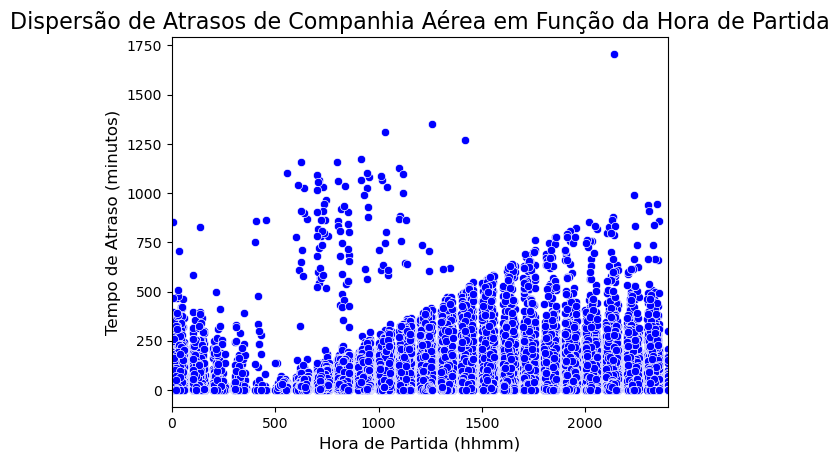

In [23]:
# Criar o scatterplot
sns.scatterplot(x=df['DepTime'], y=df['CarrierDelay'], color='blue')

plt.title('Dispersão de Atrasos de Companhia Aérea em Função da Hora de Partida', fontsize=16)
plt.xlabel('Hora de Partida (hhmm)', fontsize=12)
plt.xlim(0,2400)
plt.ylabel('Tempo de Atraso (minutos)', fontsize=12)

plt.show()

# Prepare Target Variable(s)

In [24]:
df_encoded['is_delayed_60+'] = np.where(df_encoded['CarrierDelay'] > 60, 1, 0)
# Se a condição for True return 1, se for False return 0

# Define features and target variable

In [26]:
X = df_encoded.drop(columns=['is_delayed_60+', 'CarrierDelay'])
y = df_encoded['is_delayed_60+']

# Split the data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Exploratory Data Analysis

In [28]:
train_set = pd.concat([X_train, y_train], axis=1)
#pd.concat combina dois objetos fornecidos numa lista, 
#e axis=1 indica que a concatenação deve ser feita na horizontal

# Undo one-hot encondig

In [29]:
categories

Index(['Airline', 'Origin', 'Destination'], dtype='object')

In [32]:
# Reversing one-hot enconding for multiple sets of categorical variables

for category in categories:
    one_hot_columns = [col for col in train_set.columns if col.startswith(f'{category}_')]
    
    if one_hot_columns:  # Verifica se há colunas one-hot
        train_set[category] = train_set[one_hot_columns].idxmax(axis=1)
        train_set = train_set.drop(columns=one_hot_columns)
        
        # Certificar-se de que a coluna seja do tipo string antes de substituir
        train_set[category] = train_set[category].astype(str).str.replace(f'{category}_', '')

In [33]:
train_set

,DayOfWeek,DepTime,month,day,is_delayed_60+,Airline,Origin,Destination
132504,5,2124,2,22,0,Airline_US Airways Inc.,PHX,LAS
483050,4,2218,6,19,0,Airline_American Airlines Inc.,DFW,OAK
318401,6,1500,4,26,1,Airline_American Airlines Inc.,ORD,MIA
259287,3,2112,3,12,1,Airline_American Airlines Inc.,JNU,SEA
77835,6,1730,1,26,0,Airline_American Airlines Inc.,SJU,ORD
...,...,...,...,...,...,...,...,...
439107,4,1707,6,19,0,Airline_United Air Lines Inc.,PIT,ORD
117952,3,1752,2,27,0,Airline_Skywest Airlines Inc.,ORD,LAN
435829,2,1826,6,24,0,Airline_United Air Lines Inc.,LAX,ORD
305711,1,1350,4,21,0,Airline_Atlantic Southeast Airlines,SAT,ATL


# Check distribution of target variable

In [34]:
train_set['is_delayed_60+'].value_counts()

0    313876
1     25309
Name: is_delayed_60+, dtype: int64

In [37]:
percentageOfFlightDelays = train_set['is_delayed_60+'].mean()*100
print(f"Percentage of flight delays: {percentageOfFlightDelays:.2f}%")

Percentage of flight delays: 7.46%


# Delays by Airline

In [41]:
train_set.groupby('Airline')['is_delayed_60+'].mean().sort_values(ascending=False).round(3)*100

Airline
Airline_Atlantic Southeast Airlines     16.3
Airline_Hawaiian Airlines Inc.          14.2
Airline_Skywest Airlines Inc.           10.3
Airline_American Airlines Inc.           9.0
Airline_Delta Air Lines Inc.             8.4
Airline_US Airways Inc.                  7.6
Airline_United Air Lines Inc.            7.5
Airline_American Eagle Airlines Inc.     7.0
Airline_JetBlue Airways                  5.9
Airline_Frontier Airlines Inc.           4.7
Airline_Southwest Airlines Co.           3.3
Name: is_delayed_60+, dtype: float64

# Delays by Day of the Week

In [42]:
DayOfWeek_pct_delayed = train_set.groupby('DayOfWeek')['is_delayed_60+'].mean().round(3)*100
DayOfWeek_pct_delayed

DayOfWeek
1    7.6
2    7.1
3    7.6
4    6.9
5    6.8
6    9.0
7    7.9
Name: is_delayed_60+, dtype: float64

# Delays by Origin Airport

In [45]:
pct_delay_by_origin = train_set.groupby('Origin')['is_delayed_60+'].mean().sort_values(ascending=False).round(3)*100
pct_delay_by_origin.head(20)

Origin
LWB    40.0
ACY    40.0
MQT    33.8
MCN    27.8
SLE    26.7
SCE    25.0
PFN    23.6
PHF    23.1
MKG    22.6
TRI    22.5
MEI    22.2
HHH    21.8
OAJ    21.5
FAY    21.4
ROW    21.4
VLD    20.3
AVL    19.8
ABI    19.4
EWN    19.3
CMI    18.4
Name: is_delayed_60+, dtype: float64

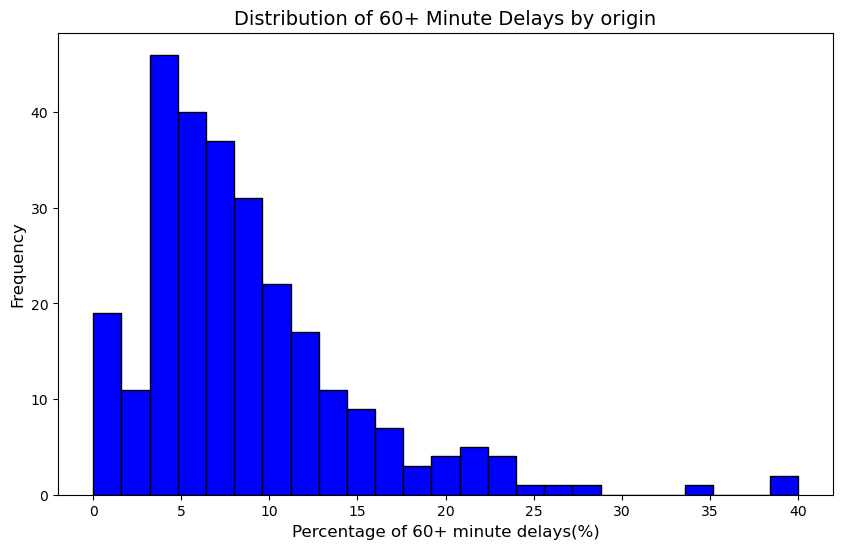

In [46]:
#Plot histogram
plt.figure(figsize=(10,6))
plt.hist(pct_delay_by_origin.values, bins=25, color='blue', edgecolor='black')

# Add labels and title
plt.title('Distribution of 60+ Minute Delays by origin', fontsize=14)
plt.xlabel('Percentage of 60+ minute delays(%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

# Initialize and Fit the XGBoost Classifier (baseline model)

In [47]:
xgb_model = xgb.XGBClassifier(random_state=0, eval_metric = 'logloss')

In [48]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0, ...)

In [49]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0, ...)

# Predict on the test set

In [50]:
y_pred = xgb_model.predict(X_test)

# Evaluate the model

In [51]:
print('XGBoost Classifier (Baseline):')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

XGBoost Classifier (Baseline):
Accuracy: 0.9247


<AxesSubplot:>

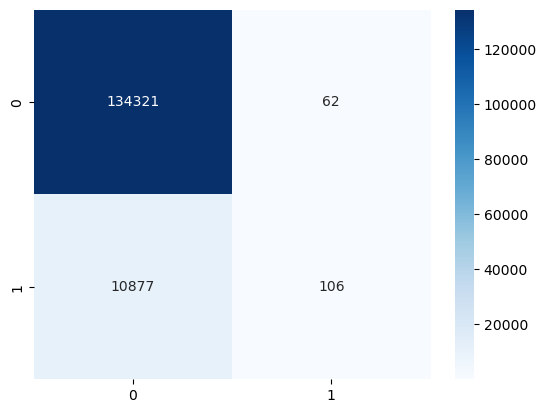

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [55]:
# Predict probabities for the test set (to calculate AUC)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

#Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc_score:.3f}")

AUC score: 0.711


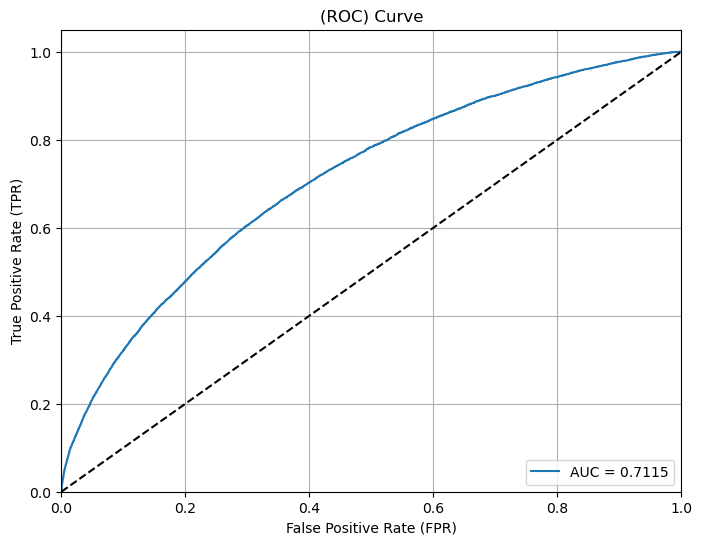

In [60]:
#Plot the ROC curve

frp, tpr, theesholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(frp, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Do Cross_Validated Grid Search

In [62]:
# Define a parameter grid with fewer values
param_grid = {
    'learning_rate': [0.05, 0.1],  # Fewer values to test
    'max_depth': [3, 4],           # Smaller depth for faster models
    'n_estimators': [50, 100],      # Fewer estimators
    'subsample': [0.8, 1.0]        # Two values for subsampling
}

# Initialize the xgboost model
xgb_model = xgb.XGBClassifier(random_state=0, eval_metric='logloss')

# Set up GridSearchCV with fewer parameter combinations
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid, 
                           cv=3,  # 3-fold cross-validation to reduce complexity
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


python(81859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(81866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 